In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [3]:
# Building permits back to 9/3/2015
bp = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Building Residential - New: Permit Type = CARN

Building Commercial - New: Permit Type = CACN

Residential Rehab: Permit Type = CARR

Commercial Rehab: Permit Type = CACR

Building Demolition: Permit Type = CADM

In [5]:
#building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

In [463]:
#new_building = building.loc[building['Permit Type Description'].str.contains('New')]

In [7]:
# demolition = bp.loc[bp['Permit Type Description'].str.contains('Demolition')]

In [8]:
#res_demolition = demolition.loc[demolition['Permit Subtype Description'].str.contains('Residential')]

In [9]:
#merged = pd.merge(new_building, res_demolition, on= 'Address')

In [308]:
# Codes that we care about
new_commercial = ['CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA05R202']

In [350]:
# Codes that we care about
new_residential = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA04R301', 'CAA05R202', 'CAA08R301', 'CAA10R301', 'CAZ08A001', 'DPLX2CNDO']

In [299]:
# rehab_commercial = ['CAA02R302', 'CAA03R201', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399']

In [310]:
demolition_codes = ['CAZ01A001', 'CAZ01A002']

In [451]:
#commercial_rehab = bp.loc[(bp['Permit Type'] == 'CARR') & (bp['Permit Subtype'].isin(rehab_commercial))]

In [464]:
#commercial_rehab.shape

## I think we should match on parcel instead of address - sometimes the address changes!

In [14]:
matched = pd.merge(bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])], new_building.loc[new_building['Permit Subtype'].isin(new_commercial + new_residential)], on = 'Address')

In [15]:
matched.shape

(1060, 39)

In [351]:
# Residential Permits where one house was demolished and a new one was put up
res_rebuild = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A001'], bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_residential))], on = 'Parcel')

In [368]:
# See for example how the address changes from 1000 Pennock Ave to 1000A Pennock Ave
res_rebuild.loc[res_rebuild['Address_x'] != res_rebuild['Address_y']].head()

,Permit #_x,Permit Type Description_x,Permit Subtype Description_x,Parcel,Date Entered_x,Date Issued_x,Const. Cost_x,Address_x,City_x,State_x,...,Zip_y,Subdivision/Lot_y,Contact_y,Permit Type_y,Permit Subtype_y,IVR Trk#_y,Purpose_y,Council Dist_y,Census Tract_y,Mapped Location_y
2,2016031224,Building Demolition Permit,Demolition Permit - Residential,08203030300,06/24/2016,06/24/2016,4000.0,1000 PENNOCK AVE,NASHVILLE,TN,...,37207,PT LOT 10 F E MANN PLAN,C & O Construction Co. Llc,CARN,CAA01R301,2104734,to rehab and convert existing 600 sf second fl...,5.0,37011800.0,"1000B PENNOCK AVE\nNASHVILLE, TN 37207\n(36.18..."
7,2018000610,Building Demolition Permit,Demolition Permit - Residential,09106027700,01/04/2018,01/04/2018,18000.0,5503 TENNESSEE AVE,NASHVILLE,TN,...,37209,LOT 1406 BLK 201 WEST NASH,"POTTER, ROGER CONSTRUCTION",CARN,CAA01R301,3453265,to construct a single family residence with 19...,20.0,37013300.0,"5503A TENNESSEE AVE\nNASHVILLE, TN 37209\n(36...."
14,201617075,Building Demolition Permit,Demolition Permit - Residential,09112002900,04/14/2016,04/14/2016,4000.0,4603A ILLINOIS AVE,NASHVILLE,TN,...,37209,LOT 506 BLK 85 W NASH PLAN NO 1,"BROADWAY BUILDING GROUP, LLC",CARN,CAA01R301,3249659,to construct 2037Sf single family residence wi...,20.0,37013300.0,"4603B ILLINOIS AVE\nNASHVILLE, TN 37209\n(36.1..."
21,2018008635,Building Demolition Permit,Demolition Permit - Residential,11616002800,02/14/2018,02/14/2018,10000.0,4001 COPELAND DR,NASHVILLE,TN,...,37215,LOT 21 SEC 2 EVERGREEN HEIGHTS,HISTORIC BUILDS LLC,CARN,CAA01R301,3466474,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 5382 S...,34.0,37017901.0,"4006 DORCAS DR\nNASHVILLE, TN 37215\n(36.10765..."
31,201618625,Building Demolition Permit,Demolition Permit - Residential,09108021100,04/22/2016,05/02/2016,10000.0,4605 MICHIGAN AVE,NASHVILLE,TN,...,37209,LOT 7 BLK 2 WEST NASH. PLAN 1,LMS HOMES LLC,CARN,CAA01R301,3258738,TO CONSTRUCT A SINGLE FAMILY RESIDENCE WITH 20...,20.0,37013300.0,"4605B MICHIGAN AVE\nNASHVILLE, TN 37209\n(36.1..."


In [369]:
res_rebuild.groupby('Census Tract_y')['Permit #_x'].count().nlargest(5)

Census Tract_y
37013300.0    71
37013400.0    47
37019200.0    38
37012200.0    31
37017901.0    28
Name: Permit #_x, dtype: int64

In [411]:
res_rebuild.shape

(755, 40)

In [372]:
# Commerical demolitions plus new commercial
com_rebuild = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A002'], bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))], on = 'Parcel')

In [443]:
com_rebuild.shape

(12, 39)

In [375]:
res_to_com = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A001'],bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))], on = 'Parcel')

In [444]:
res_to_com.shape

(0, 39)

In [381]:
com_to_res = pd.merge(bp.loc[bp['Permit Subtype'] == 'CAZ01A002'], bp.loc[(bp['Permit Type'] == 'CARN') & (bp['Permit Subtype'].isin(new_residential))], on = 'Parcel')

In [395]:
com_to_res.shape

(6, 39)

In [460]:
bp.loc[(bp['Permit Type'] == 'CACN') & (bp['Permit Subtype'].isin(new_commercial))]

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
1117,2017035608,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",08600035500,05/31/2017,11/14/2017,3688764.0,5636 OLD HICKORY BLVD 401-428,HERMITAGE,TN,37076,E/S OLD HICKORY BV. N OF CENTAL PK,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3371038,"To construct bldg. 5 of apartment complex. 34,...",12.0,37015623.0,"5636 OLD HICKORY BLVD 401-428\nHERMITAGE, TN 3..."
1602,2016040908,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",18300001200,08/09/2016,08/25/2016,20597.0,13153 OLD HICKORY BLVD,ANTIOCH,TN,37013,E SIDE OLD HICKORY BLVD S OF INT HWY,david abbey,CACN,CAA03R398,3266284,To construct cabana's. for burkitt station pha...,33.0,37019114.0,"13153 OLD HICKORY BLVD\nANTIOCH, TN 37013\n(36..."
1863,2017035786,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",09304013400,05/31/2017,12/14/2017,715977.0,401 KIRKPATRICK AVE,NASHVILLE,TN,37206,LOT 1 KIRKPATRICK PARK,"ANDERSON, R G CO INC",CACN,CAA03R398,3371323,"to construct 6,923SF bldg. H, 6 total units, f...",6.0,37019200.0,"401 KIRKPATRICK AVE\nNASHVILLE, TN 37206\n"
2505,2016065499,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",128040A00800CO,11/23/2016,11/23/2016,48949.0,510 OLD HICKORY BLVD,NASHVILLE,TN,37209,LOT 1 THE LEXINGTON PHASE 1,"ZMANCO, LLC",CACN,CAA03R399,3297252,to construct a new grilling station with pergo...,22.0,37018202.0,"510 OLD HICKORY BLVD\nNASHVILLE, TN 37209\n(36..."
2989,2017050272,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",05201014800,08/01/2017,11/09/2017,592088.0,501 FOREST PARK RD 901-904,MADISON,TN,37115,PT LOT 7 & 8 FOREST PARK ACREAGE TRACTS,"DEWEESE, CHARLES CONSTRUCTION COMPANY, INC",CACN,CAA03R398,3391902,"per master permit 201426793, to construct apar...",9.0,37010701.0,"501 FOREST PARK RD 901-904\nMADISON, TN 37115\..."
3060,2016040782,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",18300001200,08/09/2016,08/25/2016,48283.0,13153 OLD HICKORY BLVD,ANTIOCH,TN,37013,E SIDE OLD HICKORY BLVD S OF INT HWY,david abbey,CACN,CAA03R398,3266135,To construct maintenance bldg. for burkitt sta...,33.0,37019114.0,"13153 OLD HICKORY BLVD\nANTIOCH, TN 37013\n(36..."
3095,2017004546,Building Commercial - New,"Multifamily, Condominium > 5 Unit Bldg",09311005700,01/20/2017,01/24/2017,5000.0,17 HERMITAGE AVE,NASHVILLE,TN,37210,PT LOT 71 RUTLEDGE,"ANDERSON, R G CO INC",CACN,CAA03R299,3312490,"DTC, MDHA-RH\nTo locate a 12 ft x 60 ft (720 s...",19.0,37019500.0,"17 HERMITAGE AVE\nNASHVILLE, TN 37210\n(36.156..."
3137,2017035546,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",08600035500,05/31/2017,11/14/2017,6633290.0,5636 OLD HICKORY BLVD 301-363,HERMITAGE,TN,37076,E/S OLD HICKORY BV. N OF CENTAL PK,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3370943,"To construct bldg. 4 of apartment complex. 61,...",12.0,37015623.0,"5636 OLD HICKORY BLVD 301-363\nHERMITAGE, TN 3..."
4888,2016029270,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",08309018100,06/16/2016,03/22/2017,625636.0,105 S 11TH ST,NASHVILLE,TN,37206,PT LOTS 2 3 ARMSTRONG RESUB E EDGEFIELD,HARDCASTLE CONSTRUCTION CO INC,CACN,CAA03R399,3251116,to construct a new mixed used building with 2...,6.0,37019200.0,"105 S 11TH ST\nNASHVILLE, TN 37206\n(36.177187..."
5350,2017053676,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",10505055000,08/15/2017,12/15/2017,15522452.0,1500 12TH AVE S,NASHVILLE,TN,37203,PT LOT 1 EDGEHILL EST. SEC. 121 & PT OF CL ROW,BACAR CONSTRUCTORS INC,CACN,CAA03R398,3396802,SP. Planning Department Review/approval prior ...,17.0,37016200.0,"1500 12TH AVE S\nNASHVILLE, TN 37203\n(36.1365..."


## Appraised Value Data

In [478]:
sf_2009 = pd.read_csv('data/2009SINGLEFAMILYSF.txt')
sf_2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
sf_2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [479]:
sf1 = pd.merge(sf_2009, sf_2013, on= 'AddressFullAddress', how = 'outer',suffixes = ('_f','_s'))
sf1.columns

sf1.rename(columns = {'FinishedArea_f' : '2009_FinishedArea', 'FinishedArea_s' : '2013_FinishedArea'}, inplace = True)

sf1['APN']= sf1['APN_f'].where(sf1['APN_s'].isnull(), sf1['APN_s'])
sf1['DistrictCode']= sf1['DistrictCode_f'].where(sf1['DistrictCode_s'].isnull(), sf1['DistrictCode_s'])
sf1['Council District']= sf1['Council District_f'].where(sf1['Council District_s'].isnull(), sf1['Council District_s'])
sf1['AddressCity']= sf1['AddressCity_f'].where(sf1['AddressCity_s'].isnull(), sf1['AddressCity_s'])
sf1['AddressPostalCode']= sf1['AddressPostalCode_f'].where(sf1['AddressPostalCode_s'].isnull(), sf1['AddressPostalCode_s'])
#sf1['FinishedArea']= sf1['FinishedArea_f'].where(sf1['FinishedArea_s'].isnull(), sf1['FinishedArea_s'])
sf1.columns

sf1.drop(['APN_f','DistrictCode_f','Council District_f','AddressCity_f',
          'AddressPostalCode_f','DistrictCode_s','Council District_s','AddressCity_s','APN_s','AddressPostalCode_s'], axis = 1,inplace = True)

final_sf = pd.merge(sf1, sf_2017,on= 'AddressFullAddress', how = 'outer', suffixes = ('_m','_n'),indicator = True)
final_sf.columns

final_sf.rename(columns = {'FinishedArea': '2017_FinishedArea'}, inplace = True)

final_sf['APN']= final_sf['APN_m'].where(final_sf['APN_n'].isnull(), final_sf['APN_n'])
final_sf['DistrictCode']= final_sf['DistrictCode_m'].where(final_sf['DistrictCode_n'].isnull(), final_sf['DistrictCode_n'])
final_sf['Council District']= final_sf['Council District_m'].where(final_sf['Council District_n'].isnull(), final_sf['Council District_n'])
final_sf['AddressCity']= final_sf['AddressCity_m'].where(final_sf['AddressCity_n'].isnull(), final_sf['AddressCity_n'])
final_sf['AddressPostalCode']= final_sf['AddressPostalCode_m'].where(final_sf['AddressPostalCode_n'].isnull(), final_sf['AddressPostalCode_n'])
#final_sf['FinishedArea']= final_sf['FinishedArea_m'].where(final_sf['FinishedArea_n'].isnull(), final_sf['FinishedArea_n'])


final_sf.drop(['APN_m','DistrictCode_m','Council District_m','AddressCity_m',
          'AddressPostalCode_m','DistrictCode_n','Council District_n','AddressCity_n','APN_n','AddressPostalCode_n'], axis = 1, inplace = True)
final_sf.columns

final_sf.drop_duplicates(keep ='first').shape

Index(['APN_f', 'DistrictCode_f', 'Council District_f', 'AddressFullAddress',
       'AddressCity_f', 'AddressPostalCode_f', '2009 LAND', '2009 IMPR',
       '2009 TOTAL APPR', '2009 TOTAL ASSD', 'FinishedArea_f', 'APN_s',
       'DistrictCode_s', 'Council District_s', 'AddressCity_s',
       'AddressPostalCode_s', '2013 LAND', '2013 IMPR', '2013 TOTAL APPR',
       '2013 TOTAL ASSD', 'FinishedArea_s'],
      dtype='object')

In [430]:
sf = pd.merge(pd.merge(sf2009, sf2013, on = 'AddressFullAddress', how = 'outer'), sf2017, on = 'AddressFullAddress', how = 'outer')

In [431]:
sf.shape

(219620, 33)

In [426]:
sf2017.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Mortgage_Per_Month,Mortgage_Per_Year
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.0,224.958087,2699.497047
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.0,249.449492,2993.393903
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.0,224.958087,2699.497047
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.0,249.449492,2993.393903
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.0,249.449492,2993.393903


In [432]:
res_rebuild['Add'] = res_rebuild.Address_x.str.upper().str.replace(' ', '')
sf['Add'] = sf.AddressFullAddress.str.upper().str.replace(' ', '')

In [433]:
res_merged = pd.merge(res_rebuild, sf, on = 'Add', how = 'inner')

In [434]:
res_merged.shape

(639, 73)

In [20]:
dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

In [410]:
dummy.shape

(629, 72)

In [22]:
sf.shape

(197261, 31)

In [23]:
matched.shape

(1060, 39)

In [25]:
#matched.Address = matched.Address.str.replace(' ', '')

#sf.AddressFullAddress = sf.AddressFullAddress.str.replace(' ', '')

In [27]:
# dummy = pd.merge(matched, sf, left_on = 'Address', right_on= 'AddressFullAddress')

# dummy.shape

In [438]:
# dummy.loc[35]

In [30]:
sf['Pct_Change'] = (sf['2017 TOTAL APPR'] - sf['2013 TOTAL APPR']) / sf['2013 TOTAL APPR']

In [31]:
sf.Pct_Change.describe()

count    197261.000000
mean          0.428442
std           0.441329
min          -0.967016
25%           0.229383
50%           0.346114
75%           0.487901
max          58.333333
Name: Pct_Change, dtype: float64

In [32]:
dummy['Pct_Change'] = (dummy['2017 TOTAL APPR'] - dummy['2013 TOTAL APPR']) / dummy['2013 TOTAL APPR']

In [439]:
res_merged['Pct_Change'] = (res_merged['2017 TOTAL APPR'] - res_merged['2013 TOTAL APPR']) / res_merged['2013 TOTAL APPR']

In [440]:
res_merged.Pct_Change.describe()

count    453.000000
mean       1.427812
std        1.771488
min       -0.819005
25%        0.315013
50%        0.751958
75%        2.046776
max       12.150456
Name: Pct_Change, dtype: float64

In [35]:
#dummy['SF_Change'] = (dummy['FinishedArea'] - dummy['FinishedArea_y']) / dummy['FinishedArea_y']

In [441]:
res_merged['SF_Change'] = (res_merged['FinishedArea'] - res_merged['FinishedArea_y']) / res_merged['FinishedArea_y']

In [465]:
res_merged.SF_Change.describe()

count    453.000000
mean       0.723616
std        1.296238
min       -1.000000
25%        0.000000
50%        0.693172
75%        1.611111
max        5.242424
Name: SF_Change, dtype: float64

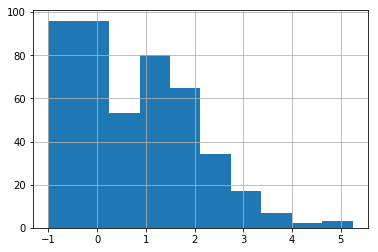

In [466]:
res_merged.SF_Change.hist()

## Tax (IRS) Data

In [38]:
tax_2016 = pd.read_csv('data/tax_2016.csv')

In [39]:
tax_2016.loc[tax_2016.STATE == 'TN']

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145648,47,TN,0,1,1157130,744180,155040,238430,530230,1712970,...,558600,522223,0,0,0,0,100290,89421,1001430,2236485
145649,47,TN,0,2,759390,357060,217720,161400,347670,1486900,...,629270,1669930,0,0,0,0,104420,176829,646580,1784387
145650,47,TN,0,3,397080,129260,216320,42020,199330,881810,...,382830,2139366,0,0,0,0,87960,222529,302820,851164
145651,47,TN,0,4,241840,43660,182240,12240,125080,607500,...,239840,2147654,20,4,0,0,60840,201452,174980,577251
145652,47,TN,0,5,299360,32690,255470,7440,163150,810660,...,298430,5663671,1010,308,120,103,108580,617348,178600,739209
145653,47,TN,0,6,95980,7300,84010,1090,70060,276890,...,95910,12461171,51840,127030,51390,214690,46560,1412055,33300,632320
145654,47,TN,37010,1,820,580,160,70,370,1120,...,360,307,0,0,0,0,90,73,630,979
145655,47,TN,37010,2,470,210,160,70,200,950,...,380,1066,0,0,0,0,70,119,390,1208
145656,47,TN,37010,3,360,80,230,40,170,880,...,340,1903,0,0,0,0,90,315,260,864
145657,47,TN,37010,4,310,40,260,20,160,880,...,300,2473,0,0,0,0,80,211,230,883


In [40]:
sf.head()

,APN_x,DistrictCode_x,Council District_x,AddressFullAddress,AddressCity_x,AddressPostalCode_x,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,...,DistrictCode,Council District,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Pct_Change
0,00200000300,RT,10,1012OLDBUCKHILLRD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,...,RT,10,GOODLETTSVILLE,37072,46700,88700,135400,33850,1920.0,0.187719
1,00200000700,RT,10,1109HIGHLANDAVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,...,RT,10,GOODLETTSVILLE,37072,40100,109700,149800,37450,1464.0,0.096633
2,00200001001002,GSD,10,0SPRINGFIELDHWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,...,GSD,10,GOODLETTSVILLE,37072,18000,185100,203100,50775,3539.0,0.171280
3,00200001400001,RT,10,133BEASTENDRD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,...,RT,10,GOODLETTSVILLE,37072,30000,34100,64100,16025,736.0,0.082770
4,00200001600001,RT,10,141BEASTENDRD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,...,RT,10,GOODLETTSVILLE,37072,18300,79500,97800,24450,1301.0,0.178313


In [41]:
print(sorted(sf['Council District'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [42]:
sf.DistrictCode.unique()

array(['RT  ', 'GSD ', 'GO  ', 'USD ', 'FH  ', 'OH  ', 'CBID', 'GBID',
       'BH  ', 'BM  '], dtype=object)

In [43]:
council_district = gpd.read_file('data/Council_District_Outlines.geojson')

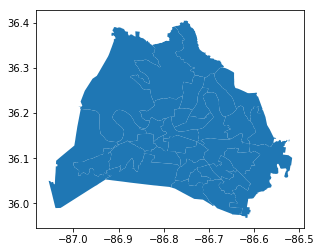

In [44]:
council_district.plot()

In [45]:
zip_codes = gpd.read_file('data/Zip_Codes.geojson')

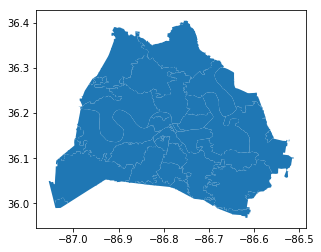

In [46]:
zip_codes.plot()

In [47]:
zc_db = gpd.sjoin(council_district, zip_codes, how="inner", op='intersects')

In [48]:
zc_db.groupby('district').zip.count()

district
1      9
10     4
11     3
12     4
13     6
14     4
15     7
16     4
17     5
18     7
19    11
2      4
20     3
21     6
22     3
23     4
24     3
25     5
26     4
27     3
28     3
29     4
3      6
30     2
31     7
32     2
33     6
34     6
35     9
4      9
5      6
6      6
7      4
8      3
9      4
Name: zip, dtype: int64

In [49]:
zip_code_list = list(zip_codes.zip.unique())

In [50]:
tax_2016 = tax_2016.loc[tax_2016.zipcode.isin(zip_code_list)]

In [51]:
tax_2016.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
145666,47,TN,37013,1,16260,10580,1930,3460,6890,25320,...,8860,9518,0,0,0,0,2110,2291,13750,32237
145667,47,TN,37013,2,14900,7470,3260,3670,5670,30520,...,11970,33215,0,0,0,0,2180,4100,12670,36063
145668,47,TN,37013,3,6040,2310,2580,960,2380,13670,...,5730,32050,0,0,0,0,1290,3598,4710,13191
145669,47,TN,37013,4,2670,630,1760,230,1100,6620,...,2640,24401,0,0,0,0,660,2531,1980,6320
145670,47,TN,37013,5,2270,340,1820,100,1050,5920,...,2270,40013,0,0,0,0,880,4789,1370,5129


In [293]:
# Income data from the IRS
by_return = tax_2016.pivot(index = 'zipcode', columns = 'agi_stub', values = 'N1')

In [53]:
by_return.head()

agi_stub,1,2,3,4,5,6
zipcode,,,,,,
37013,16260,14900,6040,2670,2270,210
37015,2960,2460,1350,770,700,120
37027,6420,3240,2590,2160,5970,6510
37064,7240,4550,2960,2480,5900,3230
37072,4890,4120,2270,1440,1730,390


In [54]:
by_return['Total'] = 12.5 * by_return[1] + 37.5 * by_return[2] + 62.5 * by_return[3] + 87.5 * by_return[4] + 150 * by_return[5] + 250 * by_return[6]

In [55]:
by_return.head()

agi_stub,1,2,3,4,5,6,Total
zipcode,,,,,,,
37013,16260,14900,6040,2670,2270,210,1766125.0
37015,2960,2460,1350,770,700,120,416000.0
37027,6420,3240,2590,2160,5970,6510,3075625.0
37064,7240,4550,2960,2480,5900,3230,2355625.0
37072,4890,4120,2270,1440,1730,390,840500.0


In [56]:
by_return['Household'] = by_return[[1, 2, 3, 4, 5, 6]].sum(axis = 1)

In [57]:
# Approximate per household income by zip code
by_return['Per_Household'] = by_return.Total / by_return.Household

In [58]:

by_return.nsmallest(10, 'Per_Household')

agi_stub,1,2,3,4,5,6,Total,Household,Per_Household
zipcode,,,,,,,,,
37210,3560,2120,770,320,220,40,243125.0,7030,34.583926
37207,9170,5740,2060,840,720,70,657625.0,18600,35.356183
37217,6910,5570,1950,700,530,50,570375.0,15710,36.306493
37115,7980,6280,2180,900,670,100,675750.0,18110,37.313639
37218,3220,2090,820,420,370,60,277125.0,6980,39.702722
37228,400,330,140,40,60,0,38625.0,970,39.819588
37208,4260,2300,900,400,500,170,348250.0,8530,40.826495
37013,16260,14900,6040,2670,2270,210,1766125.0,42350,41.703070
37086,6230,5610,2430,1220,870,70,694875.0,16430,42.293061


In [59]:
sf2017

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.00
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.00
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.00
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.00
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.00
5,103020C01800CO,USD,24,276 WHITE BRIDGE PIKE 18,NASHVILLE,37209,10000,39600,49600,19840,567.00
6,103020C01900CO,USD,24,276 WHITE BRIDGE PIKE 19,NASHVILLE,37209,10000,39600,49600,19840,567.00
7,103020C02000CO,USD,24,276 WHITE BRIDGE PIKE 20,NASHVILLE,37209,10000,39600,49600,19840,567.00
8,103020C02100CO,USD,24,276 WHITE BRIDGE PIKE 21,NASHVILLE,37209,10000,39600,49600,19840,567.00
9,103020C02200CO,USD,24,276 WHITE BRIDGE PIKE 22,NASHVILLE,37209,10000,45000,55000,22000,567.00


In [60]:
r = 0.04 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
sf2017['Mortgage_Per_Month'] = (1-d)*sf2017['2017 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

In [61]:
sf2017['Mortgage_Per_Year'] = 12* sf2017['Mortgage_Per_Month']

In [62]:
sf2017.head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Mortgage_Per_Month,Mortgage_Per_Year
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.0,224.958087,2699.497047
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.0,249.449492,2993.393903
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.0,224.958087,2699.497047
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.0,249.449492,2993.393903
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.0,249.449492,2993.393903


In [63]:
# Number of affordable single family homes by zipcode
# REMOVE HOUSES THAT DON'T EXIST!
sf2017.loc[(sf2017.Mortgage_Per_Year < 12240) & (sf2017['2017 IMPR'] > 0)].groupby('AddressPostalCode').AddressFullAddress.count().sort_values()

AddressPostalCode
37086        1
37122       30
37135       67
37220       72
37143       96
37201      112
37015      126
37219      211
37204      280
37203      628
37212      716
37027      730
37189      848
37205      881
37080      925
37215      972
37206     2368
37216     2789
37210     2834
37208     2921
37072     3020
37138     3864
37218     3978
37209     4236
37221     4458
37217     6437
37076     7350
37214     8538
37207     8583
37115     8623
37211    11559
37013    18917
Name: AddressFullAddress, dtype: int64

In [64]:
sf2017.loc[(sf2017.Mortgage_Per_Year < 12240) & (sf2017['2017 IMPR'] >= 0) & (sf2017.AddressPostalCode == 37122)].head()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea,Mortgage_Per_Month,Mortgage_Per_Year
85052,09800005701,GSD,12,3350 EARHART RD,MOUNT JULIET,37122,80000,144400,224400,56100,2263.31006,1017.753927,12213.047122
85053,09800005900,GSD,12,3388 EARHART RD,MOUNT JULIET,37122,80000,88900,168900,42225,960.00000,766.036712,9192.440548
85055,09800006200,GSD,12,5307 JOHN HAGAR RD,MOUNT JULIET,37122,129000,56800,185800,46450,898.00000,842.685738,10112.228856
85057,09800006400,GSD,12,3323 EARHART RD,MOUNT JULIET,37122,165700,56600,222300,55575,975.00000,1008.229492,12098.753901
85060,09800006900,GSD,12,3336 EARHART RD,MOUNT JULIET,37122,50800,164300,215100,53775,1863.00000,975.574286,11706.891426


## Census Data

In [65]:
income_2016 = pd.read_csv('data/Census_Data/ACS_16_5YR_S1901/ACS_16_5YR_S1901_with_ann.csv')

In [66]:
households = [col for col in list(income_2016.columns) if 'HC01_EST_VC' in col and col <= 'HC01_EST_VC11' and col > 'HC01_EST_VC01']

In [67]:
income_2016.drop(0).loc[:,households]

,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,HC01_EST_VC08,HC01_EST_VC09,HC01_EST_VC10,HC01_EST_VC11
1,2.3,4.8,4.3,8.7,9.6,25.0,18.4,17.2,2.6,7.0
2,3.4,2.6,12.3,12.6,14.7,16.8,11.8,20.9,2.9,2.1
3,8.3,4.3,9.3,7.1,17.4,21.6,13.8,13.3,2.2,2.6
4,8.1,2.0,12.8,11.5,18.6,22.4,10.4,13.5,0.6,0.0
5,2.0,6.3,9.2,7.7,12.7,26.7,17.2,13.7,2.6,1.7
6,4.8,4.9,5.8,3.0,14.6,33.9,12.6,12.4,5.9,2.1
7,7.9,8.9,11.1,9.2,16.2,16.9,14.4,10.9,3.9,0.5
8,5.1,10.7,13.0,13.8,18.1,17.3,10.5,8.8,2.4,0.4
9,6.9,2.7,14.4,20.6,11.4,21.2,12.9,9.5,0.0,0.5
10,7.6,5.0,11.6,13.9,21.1,24.8,4.3,9.3,1.6,0.8


In [68]:
# Minimum income amounts for each bracket
min_income = [0, 10000, 15000, 25000, 35000, 50000, 75000, 100000, 150000, 200000]

In [69]:
# Middle income in each bracket - use to approximate income
mid_income = []
for i in range(len(min_income) -1):
    mid_income.append((min_income[i] + min_income[i+1]) / 2)
mid_income.append(250000)

In [103]:
# Maximum housing cost (30% of income)
max_cost = np.array(min_income) * .3

In [104]:
max_cost

array([    0.,  3000.,  4500.,  7500., 10500., 15000., 22500., 30000.,
       45000., 60000.])

In [72]:
income_2016.loc[1, households].astype(float).cumsum()

HC01_EST_VC02     2.3
HC01_EST_VC03     7.1
HC01_EST_VC04    11.4
HC01_EST_VC05    20.1
HC01_EST_VC06    29.7
HC01_EST_VC07    54.7
HC01_EST_VC08    73.1
HC01_EST_VC09    90.3
HC01_EST_VC10    92.9
HC01_EST_VC11    99.9
Name: 1, dtype: float64

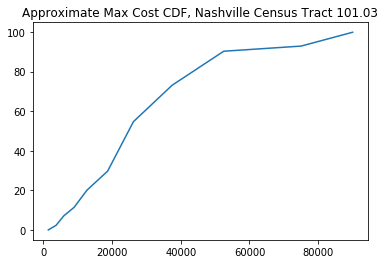

In [73]:
x = np.append(max_cost, [90000])
y = [0] + list(income_2016.loc[1, households].astype(float).cumsum())

_ = plt.plot(x,y)
_ = plt.title('Approximate Max Cost CDF, Nashville Census Tract 101.03')

In [74]:
dictionary = dict(zip(households, mid_income))

In [75]:
dictionary

{'HC01_EST_VC02': 5000.0,
 'HC01_EST_VC03': 12500.0,
 'HC01_EST_VC04': 20000.0,
 'HC01_EST_VC05': 30000.0,
 'HC01_EST_VC06': 42500.0,
 'HC01_EST_VC07': 62500.0,
 'HC01_EST_VC08': 87500.0,
 'HC01_EST_VC09': 125000.0,
 'HC01_EST_VC10': 175000.0,
 'HC01_EST_VC11': 250000}

In [76]:
gross_rent = pd.read_csv('data/Census_Data/ACS_16_5YR_B25063/ACS_16_5YR_B25063_with_ann.csv')

In [77]:
cash_rent = [col for col in list(gross_rent.columns) if 'HD01_VD' in col and col >= 'HD01_VD03']

In [78]:
housing_cost = pd.read_csv('data/Census_Data/ACS_16_5YR_B25104/ACS_16_5YR_B25104_with_ann.csv')

In [79]:
housing_cost.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD13,HD02_VD13,HD01_VD14,HD02_VD14,HD01_VD15,HD02_VD15,HD01_VD16,HD02_VD16,HD01_VD17,HD02_VD17
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - Less than $100,Margin of Error; Total: - Less than $100,Estimate; Total: - $100 to $199,Margin of Error; Total: - $100 to $199,Estimate; Total: - $200 to $299,...,"Estimate; Total: - $1,500 to $1,999","Margin of Error; Total: - $1,500 to $1,999","Estimate; Total: - $2,000 to $2,499","Margin of Error; Total: - $2,000 to $2,499","Estimate; Total: - $2,500 to $2,999","Margin of Error; Total: - $2,500 to $2,999","Estimate; Total: - $3,000 or more","Margin of Error; Total: - $3,000 or more",Estimate; Total: - No cash rent,Margin of Error; Total: - No cash rent
1,1400000US47037010103,47037010103,"Census Tract 101.03, Davidson County, Tennessee",993,54,0,12,10,11,59,...,114,34,67,42,33,22,35,25,27,26
2,1400000US47037010104,47037010104,"Census Tract 101.04, Davidson County, Tennessee",1223,84,0,12,15,18,58,...,105,55,38,28,7,10,8,12,54,64
3,1400000US47037010105,47037010105,"Census Tract 101.05, Davidson County, Tennessee",1642,95,0,12,13,14,80,...,163,78,113,54,40,28,26,20,36,45
4,1400000US47037010106,47037010106,"Census Tract 101.06, Davidson County, Tennessee",999,59,0,12,0,12,73,...,161,56,17,19,21,18,7,10,6,8


In [80]:
categories = [col for col in list(housing_cost.columns) if 'HD01_VD' in col and col >= 'HD01_VD02' and col <= 'HD01_VD16']

In [81]:
categories

['HD01_VD02',
 'HD01_VD03',
 'HD01_VD04',
 'HD01_VD05',
 'HD01_VD06',
 'HD01_VD07',
 'HD01_VD08',
 'HD01_VD09',
 'HD01_VD10',
 'HD01_VD11',
 'HD01_VD12',
 'HD01_VD13',
 'HD01_VD14',
 'HD01_VD15',
 'HD01_VD16']

In [82]:
min_rent = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]) * 12

In [83]:
min_rent

array([    0,  1200,  2400,  3600,  4800,  6000,  7200,  8400,  9600,
       10800, 12000, 18000, 24000, 30000, 36000])

In [84]:
list(100 * housing_cost.loc[1, categories].astype(float).cumsum() / housing_cost.loc[1, categories].astype(float).sum())

[0.0,
 1.0351966873706004,
 7.142857142857143,
 12.422360248447205,
 24.94824016563147,
 34.47204968944099,
 36.749482401656316,
 41.09730848861284,
 42.028985507246375,
 46.480331262939956,
 74.22360248447205,
 86.0248447204969,
 92.96066252587991,
 96.3768115942029,
 100.0]

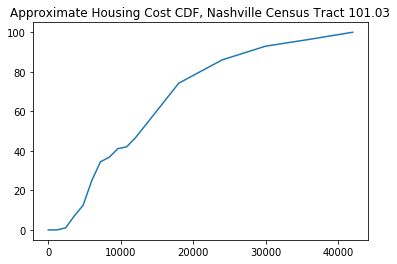

In [85]:
x = np.append(min_rent, [3500 * 12])
y = [0] + list(100 * housing_cost.loc[1, categories].astype(float).cumsum() / housing_cost.loc[1, categories].astype(float).sum())

_ = plt.plot(x,y)
_ = plt.title('Approximate Housing Cost CDF, Nashville Census Tract 101.03')

In [184]:
def findy(x1, y1, x2, y2, x):
    '''Find the y value at x for a line through (x1, y1), (x2, y2)'''
    m = (y2 - y1)/(x2 - x1)
    y = m*(x - x1) + y1
    return y

def area(x1, y1, x2, y2):
    '''Find the area between two piecewise linear curves.
    Note: x1 and x2 must start and end at the same values'''
    x = sorted(list(set(x1 + x2))) #Get a common set of x-values
    h1 = np.zeros(len(x))
    h2 = np.zeros(len(x))
    h = np.zeros(len(x))
    f1 = dict(zip(x1, y1))
    f2 = dict(zip(x2, y2))
    for i in range(len(x)):
        if x[i] in x1:
            h1[i] = y1[x1.index(x[i])]
        else:
            h1[i] = findy(max([_ for _ in x1 if _ < x[i]]),  f1[max([_ for _ in x1 if _ < x[i]])],min([_ for _ in x1 if _ > x[i]]), f1[min([_ for _ in x1 if _ > x[i]])], x[i])
        if x[i] in x2:
            h2[i] = y2[x2.index(x[i])]
        else:
            h2[i] = findy(max([_ for _ in x2 if _ < x[i]]),  f2[max([_ for _ in x2 if _ < x[i]])],min([_ for _ in x2 if _ > x[i]]), f2[min([_ for _ in x2 if _ > x[i]])], x[i])
        h[i] = h1[i] - h2[i]
    
    area = 0
    for i in range(len(x) -1):
        area += 0.5 * (x[i+1] - x[i]) * (h[i] + h[i+1])
    return area
    

Compare housing demand (% of low-income households in a census tract) vs supply (% of low-housing cost households in a tract). Based on census data.

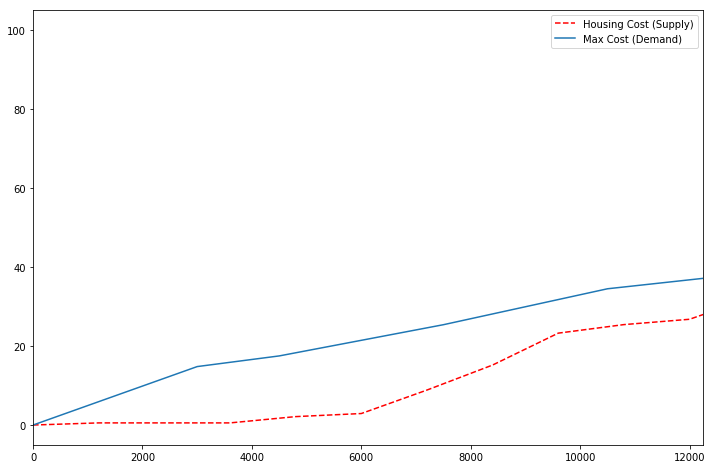

In [462]:
i = 158

plt.figure(figsize=(12, 8))

x1 = np.append(min_rent, [3500 * 12])
y1 = [0] + list(100 * housing_cost.loc[i, categories].astype(float).cumsum() / housing_cost.loc[i, categories].astype(float).sum())

_ = plt.plot(x1,y1, linestyle = '--', color = 'red')

x2 = np.append(max_cost, [90000])
y2 = [0] + list(income_2016.loc[i, households].astype(float).cumsum())

_ = plt.plot(x2,y2)


plt.xlim(0, 12240)

plt.legend(['Housing Cost (Supply)', 'Max Cost (Demand)'])


#_ = plt.title('Approximate Housing Cost CDF, Nashville Census Tract 101.03')

In [337]:
x1_new = list(x1[:11]) + [12240]
y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]

x2_new = list(x2[:5]) + [12240]
y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

area(x1_new, y1_new, x2_new, y2_new)

-10290.923711340223

In [214]:
areas = np.zeros(162)
for i in range(1,len(areas)):
    x1 = np.append(min_rent, [3500 * 12])
    y1 = [0] + list(100 * housing_cost.loc[i, categories].str.replace('-', '0').astype(float).cumsum() / housing_cost.loc[i, categories].astype(float).sum())
    x2 = np.append(max_cost, [90000])
    y2 = [0] + list(income_2016.loc[i, households].str.replace('-','0').astype(float).cumsum())
    x1_new = list(x1[:11]) + [12240]
    y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]
    x2_new = list(x2[:5]) + [12240]
    y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

    areas[i] = area(x1_new, y1_new, x2_new, y2_new)

In [243]:
census_2016 = pd.merge(income_2016,housing_cost)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]

In [244]:
census_2016['Year'] = 2016

In [246]:
census_2016.drop(0, inplace = True)

In [251]:
def get_areas(row):
    x1 = np.append(min_rent, [3500 * 12])
    y1 = [0] + list(100 * row[categories].str.replace('-', '0').astype(float).cumsum() / row[categories].astype(float).sum())
    x2 = np.append(max_cost, [90000])
    y2 = [0] + list(row[households].str.replace('-','0').astype(float).cumsum())
    x1_new = list(x1[:11]) + [12240]
    y1_new = y1[:11] + [findy(x1[10], y1[10], x1[11], y1[11], 12240)]
    x2_new = list(x2[:5]) + [12240]
    y2_new = y2[:5] + [findy(x2[4], y2[4], x2[5], y2[5], 12240)]

    return area(x1_new, y1_new, x2_new, y2_new)

In [253]:
census_2016['Area'] = census_2016.apply(get_areas, axis = 1)

In [275]:
census_2016['Area_Scaled'] = census_2016.Area * census_2016['HC01_EST_VC01'].astype('float')

In [276]:
income_2015 = pd.read_csv('data/Census_Data/ACS_15_5YR_S1901/ACS_15_5YR_S1901_with_ann.csv')
housing_cost_2015 = pd.read_csv('data/Census_Data/ACS_15_5YR_B25104/ACS_15_5YR_B25104_with_ann.csv')
census_2015 = pd.merge(income_2015,housing_cost_2015)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]
census_2015 = census_2015.drop(0)
census_2015['Area'] = census_2015.apply(get_areas, axis = 1)
census_2015['Area_Scaled'] = census_2015.Area * census_2015['HC01_EST_VC01'].astype('float')

In [278]:
census_2016.nsmallest(5, 'Area_Scaled')

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
158,1400000US47037019500,47037019500,"Census Tract 195, Davidson County, Tennessee",3331,14.8,2.7,7.9,9.1,6.8,21.3,...,72,45,964,891,374,80,130,2016,-145022.760168,-4.830708e+08
117,1400000US47037018202,47037018202,"Census Tract 182.02, Davidson County, Tennessee",3363,2.6,5.7,6.4,9.5,14.3,21.0,...,303,407,1210,725,179,83,100,2016,-71910.426475,-2.418348e+08
110,1400000US47037017800,47037017800,"Census Tract 178, Davidson County, Tennessee",2724,8.4,4.1,4.5,12.4,8.8,14.1,...,75,154,641,659,237,143,188,2016,-87341.714890,-2.379188e+08
17,1400000US47037010702,47037010702,"Census Tract 107.02, Davidson County, Tennessee",1750,18.6,17.1,22.0,21.1,8.3,10.4,...,173,99,241,56,29,10,0,2016,-133560.600207,-2.337311e+08
80,1400000US47037015626,47037015626,"Census Tract 156.26, Davidson County, Tennessee",2765,8.6,8.4,11.6,17.1,21.6,14.3,...,421,238,725,91,54,0,15,2016,-74577.405995,-2.062065e+08


In [292]:
# income_2014 = pd.read_csv('data/Census_Data/ACS_14_5YR_S1901/ACS_14_5YR_S1901_with_ann.csv')
# housing_cost_2014 = pd.read_csv('data/Census_Data/ACS_14_5YR_B25104/ACS_14_5YR_B25104_with_ann.csv')
# census_2014 = pd.merge(income_2014,housing_cost_2014)[['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01'] + households + categories]
# census_2014 = census_2014.drop(0)
# census_2014['Area'] = census_2014.apply(get_areas, axis = 1)
# census_2014['Area_Scaled'] = census_2014.Area * census_2014['HC01_EST_VC01'].astype('float')

In [328]:
census_2016.loc[census_2016['GEO.id2'].str.contains('37013300')]

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
45,1400000US47037013300,47037013300,"Census Tract 133, Davidson County, Tennessee",1586,7.5,6.2,15.0,16.5,18.6,14.8,...,177,155,363,174,15,7,0,2016,-12649.415,-20061972.19


In [335]:
census_2016.loc[census_2016['GEO.id2'].str.contains('37019200')]

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC07,...,HD01_VD10,HD01_VD11,HD01_VD12,HD01_VD13,HD01_VD14,HD01_VD15,HD01_VD16,Year,Area,Area_Scaled
155,1400000US47037019200,47037019200,"Census Tract 192, Davidson County, Tennessee",1561,10.4,4.6,10.1,11.1,17.0,14.4,...,141,95,378,212,57,43,53,2016,-10290.923711,-1.606413e+07
